In [4]:
import gzip
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
import string
from collections import defaultdict
from gensim.models import Word2Vec
#from nltk.stem.porter import *
from sklearn import linear_model
from sklearn.manifold import TSNE
import pandas as pd
import gzip
from collections import defaultdict
from sklearn import linear_model
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def parse(f):
    for l in gzip.open(f):
        yield eval(l)

In [6]:
modcloth = list(parse("modcloth_final_data.json.gz"))

In [7]:
pd.DataFrame(modcloth).dtypes

item_id            object
waist              object
size                int64
quality           float64
cup size           object
hips               object
bra size           object
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe size          object
shoe width         object
review_summary     object
review_text        object
dtype: object

In [8]:
df = pd.DataFrame(modcloth)

In [14]:
heights = df[['']

def height_calc(y):
    if isinstance(y, float):
        fake = random.sample(heights, 1)
        return height_calc(fake[0])

    if len(y) > 3:
        nums = y.split()
        feet = int(nums[0][0]) * 12
        inches = int(nums[-1][0])
        return feet + inches
    else:
        return int(y[0])

KeyError: 'heights'

In [12]:
df['height'] = df['height'].apply(height_calc)
df.head()

NameError: name 'heights' is not defined

In [204]:
for col in df.columns:
    if df[col].isna().sum() != 0:
        print(col, df[col].isna().sum())

waist 79908
quality 68
cup size 6255
hips 26726
bra size 6018
bust 70936
length 35
shoe size 54875
shoe width 64183
review_summary 6725
review_text 6725


(array([24.,  0., 30., 38., 24., 29., 33., 81.,  0.,  0.]),
 array([50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.]),
 <BarContainer object of 10 artists>)

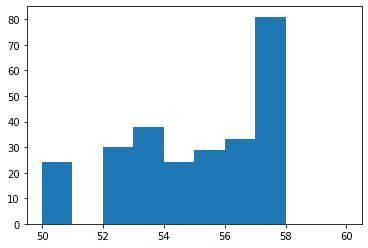

In [212]:
plt.hist(df['height'], range = (50, 60))

(array([   53.,     0.,     0.,  1059.,    92.,   143.,     0., 24188.,
        33317., 20231.]),
 array([40., 43., 46., 49., 52., 55., 58., 61., 64., 67., 70.]),
 <BarContainer object of 10 artists>)

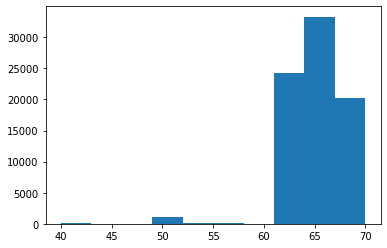

In [213]:
plt.hist(df['height'], range = (40, 70))

(array([78378.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([ 60., 104., 148., 192., 236., 280., 324., 368., 412., 456., 500.]),
 <BarContainer object of 10 artists>)

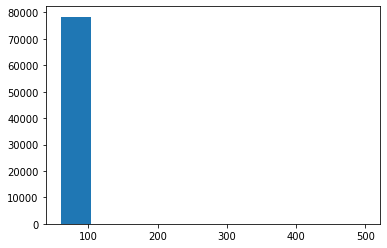

In [218]:
plt.hist(df['height'], range = (60, 500))

(array([0.0000e+00, 0.0000e+00, 1.0590e+03, 3.0000e+01, 6.2000e+01,
       6.2000e+01, 8.1000e+01, 0.0000e+00, 1.5473e+04, 3.0111e+04]), array([45., 47., 49., 51., 53., 55., 57., 59., 61., 63., 65.]), <BarContainer object of 10 artists>)
(array([   56.,    81.,     0.,  1059.,    92.,   143., 15473., 42032.,
       20231.,   336.]), array([35., 39., 43., 47., 51., 55., 59., 63., 67., 71., 75.]), <BarContainer object of 10 artists>)
(array([    0.,     0.,   137.,     0.,  1151.,   143., 57505., 20231.,
         434.,    98.]), array([25., 31., 37., 43., 49., 55., 61., 67., 73., 79., 85.]), <BarContainer object of 10 artists>)
(array([0.0000e+00, 0.0000e+00, 5.6000e+01, 8.1000e+01, 1.1510e+03,
       1.5616e+04, 6.2263e+04, 4.3400e+02, 9.8000e+01, 1.1000e+02]), array([15., 23., 31., 39., 47., 55., 63., 71., 79., 87., 95.]), <BarContainer object of 10 artists>)
(array([ 2926.,     0.,     0.,   137.,  1151., 36284., 41887.,   197.,
         153.,     0.]), array([  5.,  15.,  25.,  35., 

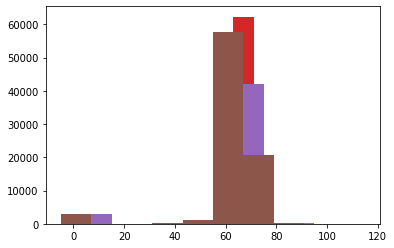

In [211]:
start = 55
multi = 0
cnt = 1
while (multi < start):
    multi = 10 * cnt
    cnt += 1
    print(plt.hist(df['height'], range = (start - multi, start + multi)))

(array([ 2051., 16286., 20336., 25076.,   486.,  7493.,  5782.,   159.,
         3660.,  1461.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

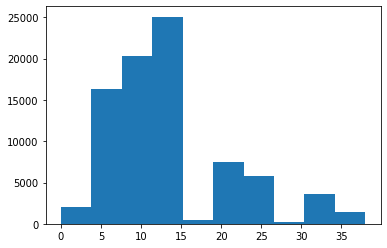

In [206]:
plt.hist(df['size'])

(array([0.00075492, 0.        , 0.03118515, 0.00897671, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00038432, 0.00038432,
        0.00038432, 0.        , 0.0003706 , 0.        , 0.00035687,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01420626, 0.00032942, 0.        ,
        0.00041178, 0.00052158, 0.00032942, 0.        , 0.00039805,
        0.00045295, 0.00111179, 0.        , 0.        , 0.        ,
        0.10652637, 0.        , 0.1058538 , 0.11962084, 0.16406516,
        0.12961326, 0.16362593, 0.12611317, 0.08

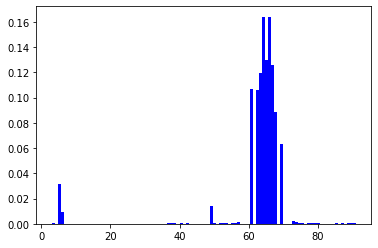

In [224]:
mean = statistics.mean(df['height'])
sd = statistics.stdev(df['height'])

plt.hist(df['height'], bins=100, density=True, alpha=1, color='b')

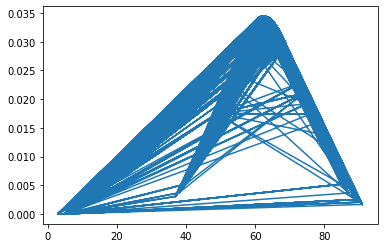

In [228]:
import statistics
from scipy.stats import norm
mean = statistics.mean(df['height'])
sd = statistics.stdev(df['height'])

plt.plot(df['height'], norm.pdf(df['height'], mean, sd))
plt.show()

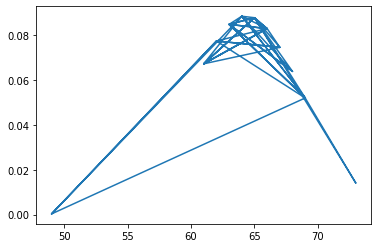

In [239]:
import statistics
from scipy.stats import norm

plt.plot(df[['height']][60:100], norm.pdf(df[['height']][60:100], df[['height']][60:100].mean().values[0], df[['height']][60:100].std().values[0]))
plt.show()

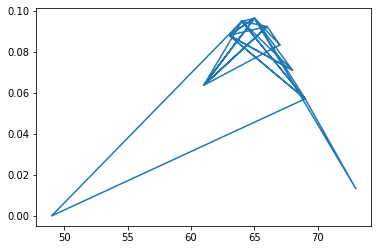

In [240]:
import statistics
from scipy.stats import norm

plt.plot(df[['height']][70:100], norm.pdf(df[['height']][70:100], df[['height']][70:100].mean().values[0], df[['height']][70:100].std().values[0]))
plt.show()

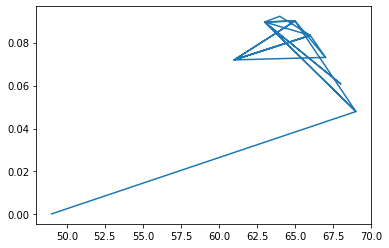

In [241]:
import statistics
from scipy.stats import norm

plt.plot(df[['height']][80:100], norm.pdf(df[['height']][80:100], df[['height']][80:100].mean().values[0], df[['height']][80:100].std().values[0]))
plt.show()

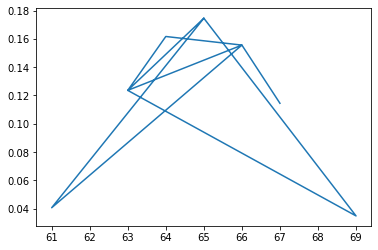

In [242]:
import statistics
from scipy.stats import norm

plt.plot(df[['height']][90:100], norm.pdf(df[['height']][90:100], df[['height']][90:100].mean().values[0], df[['height']][90:100].std().values[0]))
plt.show()

In [231]:
statistics.mean(df[['height']][60:100])

TypeError: can't convert type 'str' to numerator/denominator

In [236]:
df[['height']][60:100].std().values[0]

4.498147766951786

In [237]:
df[['height']][60:100]

,height
60,69
61,63
62,66
63,65
64,66
65,62
66,67
67,62
68,49
69,62
